In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
import numpy as np

# <center>Reading data</center>

In [5]:
df_xl = pd.read_excel('test.xls', sheetname="Data" ,dtype={ '_5000': float})
df_xl = df_xl.drop(['_10','_50','_100','_500','_1000'], axis=1)

df_xl.reset_index(inplace=True)
df_xl['Date'] = pd.to_datetime(df_xl['DATE'])
df_xl = df_xl.set_index('DATE')

In [6]:
def ARIMA_X_ARIMA(df_ts,amount_of_years):
    # First ARIMA
    model1 = ARIMA(df_ts._5000[:-12], order=(2,0,2))
    model_fit1 = model1.fit(disp=0)
    output_ARIMA1 = model_fit1.forecast(steps=12)[0]
    
    train_jan = pd.DataFrame()
    train_feb = pd.DataFrame()
    train_mar = pd.DataFrame()
    train_apr = pd.DataFrame()
    train_may = pd.DataFrame()
    train_jun = pd.DataFrame()
    train_jul = pd.DataFrame()
    train_aug = pd.DataFrame()
    train_sep = pd.DataFrame()
    train_oct = pd.DataFrame()
    train_nov = pd.DataFrame()
    train_dec = pd.DataFrame()

    for i in range(amount_of_years):
        train_jan = train_jan.append(df_xl.ix[0+i*12])
        train_feb = train_feb.append(df_xl.ix[1+i*12])
        train_mar = train_mar.append(df_xl.ix[2+i*12])
        train_apr = train_apr.append(df_xl.ix[3+i*12])
        train_may = train_may.append(df_xl.ix[4+i*12])
        train_jun = train_jun.append(df_xl.ix[5+i*12])
        train_jul = train_jul.append(df_xl.ix[6+i*12])
        train_aug = train_aug.append(df_xl.ix[7+i*12])
        train_sep = train_sep.append(df_xl.ix[8+i*12])
        train_oct = train_oct.append(df_xl.ix[9+i*12])
        train_nov = train_nov.append(df_xl.ix[10+i*12])
        train_dec = train_dec.append(df_xl.ix[11+i*12])
        
    arima2_result = np.array([])
    arima2_train_data = [[train_jan], 
                     [train_feb], 
                     [train_mar], 
                     [train_apr], 
                     [train_may], 
                     [train_jun], 
                     [train_jul], 
                     [train_aug], 
                     [train_sep],
                     [train_oct],
                     [train_nov],
                     [train_dec]
                    ]
    
    for i in range(12):
        model2 = ARIMA(arima2_train_data[i][0]._5000, order=(1,0,0))
        model_fit2 = model2.fit(disp=0)
        arima2_month_forecast = model_fit2.forecast(steps=1)[0]
        arima2_result = np.append(arima2_result,arima2_month_forecast)
        
    arima2_result = np.nan_to_num(arima2_result)
    
    z = df_ts._5000[-12:]
    arima1 = output_ARIMA1
    arima2 = arima2_result
    
    alpha_12 = np.array([])
    for i in range(12):
        alpha_12 = np.append(alpha_12,np.array([(z[i]-arima2[i])/(arima1[i]-arima2[i])]))
        
    alpha_12 = alpha_12[(alpha_12 <= 1.0) & (alpha_12 >= 0.0)]
    
    alpha = np.mean(alpha_12)
    beta = 1. - alpha
    final_forecast = np.array([])
    
    for i in range(12):
        final_forecast = np.append(final_forecast, alpha*arima1[i]+beta*arima2[i])
        
    mse_result = mse(final_forecast,df_ts._5000[-12:])
    
    plt.plot(df_xl.index[-12:],df_xl._5000[-12:], color='b', label='Real')
    plt.plot(df_xl.index[-12:],final_forecast, color='r', label='Forecasted')
    plt.grid(color='#999999', linestyle='dashed', linewidth=1, alpha=0.8)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    plt.xlabel('День')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Значение')
    plt.show()
    
    return (final_forecast,mse_result)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


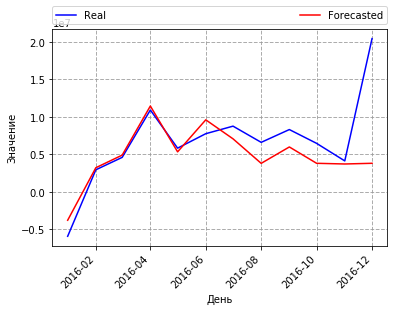

In [7]:
a,b = ARIMA_X_ARIMA(df_xl,3)

In [8]:
print(a,b)

[ -3813812.30566544   3202850.02453935   4888774.46111664
  11450307.00128902   5325279.79639007   9602601.84874697
   7064592.26601777   3789874.46500832   5978902.79112634
   3795509.39169105   3703933.13181896   3796810.25998719] 2.57948724397e+13
